In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

Сгенерируйте выборку $𝑋_1, ..., 𝑋_{100}$ из распределения 𝑁(0, 1). Для каждого 𝑛 <= 100 в
модели 𝑁(𝜃, 1) найдите оценку максимального правдоподобия по выборке $𝑋_1, ..., 𝑋_n$
и байесовскую оценку, для которой в качестве априорного распределения возьмите 
сопряженное из теоретической задачи. 

In [134]:
big_sample = sts.norm(0., 1.).rvs(size=100)

### Найдем для $𝑋_1, ..., 𝑋_n$ в модели 𝑁(𝜃, 1) оценку максимального правдоподобия:

$f_\theta(X) = \rho_\theta(X_1)\cdot ...\cdot \rho_\theta(X_n) = (\frac{1}{\sqrt{2\pi}})^n e^{-\frac{1}{2}\sum (X_i-\theta)^2} \rightarrow max$

$L_\theta = lnf_\theta = ... = \theta\sum X_i - \frac{n}{2}\theta^2 \rightarrow max$

$L_\theta^{'} = \sum X_i - n\theta = 0 \rightarrow \theta^* = \frac{\sum X_i}{n} $

### Сопряженное распределение:

N($\left.\left(\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2}\right)\right/\left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right),\, \left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)^{-1}$)

Нам нужно найти байесовскую оценку матожидания $\theta$, 

то есть условное матожидание сопряженного распределения $E(\theta|X)$, 
которое как раз равно 

$\left.\left(\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2}\right)\right/\left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right) = \theta^* $

Знаем, что $\sigma^2$ = 1 :

$\theta^* = \left.\left(\frac{\mu_0}{\sigma_0^2} + \sum_{i=1}^n x_i\right)\right/\left(\frac{1}{\sigma_0^2} + n\right) $

In [135]:
def bayes_estimator(X_array, param):
    E, D = param[0], param[1]
    return (E/D + X_array.sum()*1.) / (1./D + len(X_array)*1.)

def likelihood_estimator(X_array):
    return X_array.mean()

Возьмите несколько значений параметров
сдвига и масштаба для априорного распределения $(\mu_0, \sigma_0^2)$: 

1) (0, 1), 

2) (0, 100), 

3) (10, 1), 

4) (10, 100).


Постройте графики абсолютной величины отклонения оценки от истинного значения
параметра в зависимости от 𝑛 для оценки максимального правдоподобия и байесовских 
оценок, которым соответствуют разные значения параметров априорного
распределения (5 кривых на одном графике). Сделайте выводы.

Считаем, что при указании параметров распределений в задании используется синтаксис $(\mu,\sigma^2)$

# $N(\theta, 1)$

In [136]:
params = [ [0.,1.], [0.,100.], [10.,1.], [10.,100.] ]

sample = np.array([])
bayes_values = [[],[],[],[]]
likelihood_values = []

for n in range(0, len(big_sample)):
    sample = np.append(sample, big_sample[n])
    for i, param in enumerate(params):
        bayes_values[i].append(abs(bayes_estimator(sample, param)))
    likelihood_values.append(abs(likelihood_estimator(sample)))

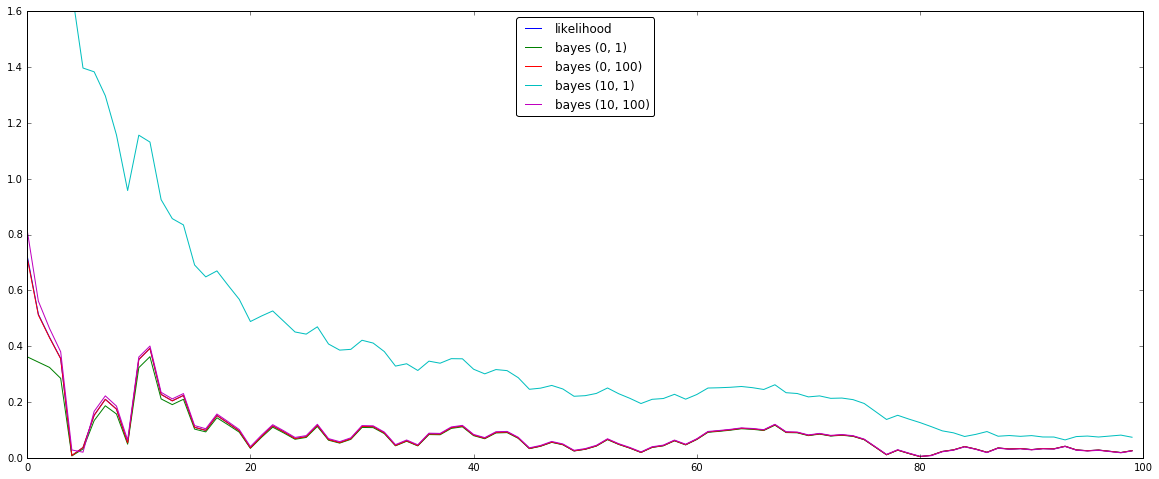

In [137]:
N = range(0, len(big_sample))

plt.figure(figsize=(20,8))
plt.ylim(0, 1.6)

plt.plot(N, likelihood_values, label='likelihood')

for i, param in enumerate(params):
    label = "bayes (%d, %d)" % (int(param[0]), int(param[1]))
    plt.plot(N, bayes_values[i], label=label)
    
plt.legend(loc='upper center', fancybox=True)
plt.show()

# $N(0, \theta)$


Аналогичные исследования произведите для модели 𝑁(0, 𝜃).

### Найдем для $𝑋_1, ..., 𝑋_n$ в модели 𝑁(0, 𝜃) оценку максимального правдоподобия:

$f_\theta(X) = \rho_\theta(X_1)\cdot ...\cdot \rho_\theta(X_n) = (\frac{1}{\sqrt{2\pi}})^n (\frac{1}{\sigma})^n e^{-\frac{1}{2\sigma^2}\sum X_i^2} \rightarrow max$

$L_\theta = lnf_\theta = ... = const_\theta - nln\sigma - \frac{\sum X_i^2}{2\sigma^2} \rightarrow max$

$L_\theta^{'} = \frac{1}{\sigma^3}\sum X_i^2 - \frac{n}{\sigma} = 0 \rightarrow \theta^* = \sigma^2 = \frac{\sum X_i^2}{n} $

### Сопряженное распределение:

При известном $\mu=0$ сопряженным распределением будет обратное гамма-распределение с параметрами

$\mathbf{\alpha}+\frac{n}{2},\, \mathbf{\beta} + \frac{\sum_{i=1}^n{x_i^2}}{2}$

Матожидание, то есть байесовская оценка $\sigma^2$, равно 

$E = \frac{\beta^{'}}{\alpha^{'}-1}$

$\frac {\mathbf{\beta} + \frac{\sum_{i=1}^n{x_i^2}}{2}}{ \mathbf{\alpha}+\frac{n}{2} - 1} = \theta^*$ 




In [138]:
def bayes_estimator_sigma(X_array, param):
    a, b = param[0], param[1]
    return (b + 0.5*(X_array*X_array).sum()*1.)/(a + 0.5*len(X_array) - 1.)

def likelihood_estimator_sigma(X_array):
    return (X_array*X_array).mean()

В этом случае возьмите
следующие параметры сдвига и масштаба для априорного распределения $(\alpha,\beta)$: 

1) (1, 1), 

2) (1, 100), 

3) (10, 1), 

4) (10, 100).

In [139]:
params = [ [1.,1.], [1.,100.], [10.,1.], [10.,100.] ]

sample = np.array([])
bayes_values = [[],[],[],[]]
likelihood_values = []

for n in range(0, len(big_sample)):
    sample = np.append(sample, big_sample[n])
    for i, param in enumerate(params):
        bayes_values[i].append(abs(1.-bayes_estimator_sigma(sample, param)))
    likelihood_values.append(abs(1.-likelihood_estimator_sigma(sample)))

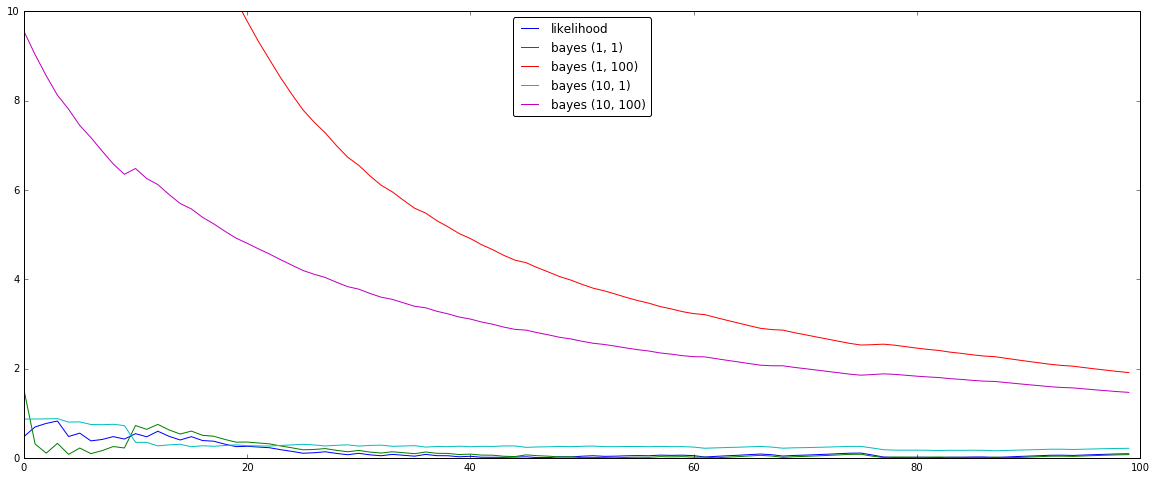

In [140]:
N = range(0, len(big_sample))

plt.figure(figsize=(20,8))
plt.ylim(0, 10.)

plt.plot(N, likelihood_values, label='likelihood')

for i, param in enumerate(params):
    label = "bayes (%d, %d)" % (int(param[0]), int(param[1]))
    plt.plot(N, bayes_values[i], label=label)
    
plt.legend(loc='upper center', fancybox=True)
plt.show()

# Вывод:
## Байесовская оценка очень похожа на оценку максимального правдоподобия (если брать разумные параметры априорного распределения), а иногда лучше неё.
## Самое главное - использовать догадки, каким может быть параметр, подбирая параметры байеса